In [2]:
import numpy as np 
import pandas as pd 
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Шлях до папки з аудіофайлами
audio_parent_folder = 'C:\\Users\\Admin\\Downloads\\МН\\data'
features = []
data=[]
# Шлях до папки для зображень
image_folder = 'C:\\Users\\Admin\\Downloads\\МН\\images'

# Перебір усіх папок з аудіофайлами
for foldername in os.listdir(audio_parent_folder):
    # Шлях до поточної папки
    current_folder = os.path.join(audio_parent_folder, foldername)
    
    # Перевірка, чи поточний шлях є папкою
    if os.path.isdir(current_folder):
        # Перебір усіх аудіофайлів у поточній папці
        for filename in os.listdir(current_folder):
            # Завантаження аудіофайлу
            audio_path = os.path.join(current_folder, filename)
            y, sr = librosa.load(audio_path)
            
            mfccs = librosa.feature.mfcc(y=y, sr=sr)
            # Усереднення MFCC
            mfccs_mean = np.mean(mfccs, axis=1)
            digit=int(filename[0])
            features = np.append(mfccs_mean, digit)
            data.append(features)
            

In [24]:
cols = ['mean_' + str(x+1) for x in range(20)] + ['Digit']
df = pd.DataFrame(data, columns=cols)


In [31]:
df.sample(20)

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,...,mean_12,mean_13,mean_14,mean_15,mean_16,mean_17,mean_18,mean_19,mean_20,Digit
15924,-589.477722,83.012901,4.390791,58.140030,16.377886,-16.687719,-11.925487,-2.224249,-8.772384,4.580597,...,1.592498,2.481785,2.658576,-8.189647,4.923638,-3.254574,2.617733,0.520463,-2.533026,8.0
16335,-550.376160,13.785060,27.257931,23.973772,13.801039,15.695023,-16.264303,-3.554695,-4.658907,-3.228968,...,5.551291,-2.610255,2.389887,2.855141,5.395123,-7.934407,4.499763,2.505489,3.255173,6.0
8538,-638.920227,97.946449,23.629631,44.351383,28.456818,10.151848,11.180925,-0.363198,-5.514480,0.371244,...,2.061172,3.089926,10.369837,2.626452,0.546661,1.234666,0.272714,-5.264082,4.232171,0.0
1201,-601.726807,131.345139,18.788771,11.206189,5.201017,-9.234744,0.990659,9.624821,-0.882028,13.774097,...,8.610039,9.275283,1.524290,-0.517873,0.767716,-1.607609,0.377463,2.349000,6.359634,4.0
20905,-611.776123,90.063530,-0.804681,61.813251,27.055178,-15.586877,3.374408,6.445511,-0.669730,2.515123,...,6.843585,2.080213,2.949800,-2.306705,8.286770,6.394320,3.419967,-3.149301,3.380736,8.0
25957,-611.578186,102.576691,-3.649438,28.790834,13.035153,-11.744481,1.394457,6.575301,10.578948,7.232036,...,3.493293,-12.254786,-1.091460,-9.071459,-5.189089,-3.469507,-13.996840,-7.342863,-1.233475,9.0
16881,-532.048767,93.292366,29.557486,17.496792,27.619505,8.541164,-6.775821,-3.095715,-14.536551,8.900911,...,8.681337,1.880815,0.011841,2.236141,9.028109,-0.623127,0.747649,-2.258538,1.043325,7.0
29830,-637.483276,16.388515,44.872734,18.106153,29.429602,13.423875,-11.675359,10.770581,-1.662236,0.627495,...,-0.291457,5.992888,3.479509,2.735392,8.482166,-5.215342,10.465467,-7.982543,6.277980,6.0
75,-658.541321,135.859482,28.954262,25.126169,18.577665,0.942826,15.212300,-11.083632,2.990809,-2.763056,...,13.950358,-2.364215,-6.987693,-3.745580,-1.708623,-2.987823,1.703428,-7.805639,2.153039,1.0
17727,-615.060608,99.673286,22.422018,5.212531,-5.554550,-12.427678,3.635077,0.819197,-2.594612,5.975582,...,4.260019,-0.802105,1.218806,0.325493,-0.664904,-4.094002,-1.894508,-4.912910,-2.835935,4.0


In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Стандартизація фіч
X=df.drop("Digit", axis=1)
y=df["Digit"]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


In [36]:
df["Digit"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Digit, dtype: float64

In [42]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29995    9.0
29996    9.0
29997    9.0
29998    9.0
29999    9.0
Name: Digit, Length: 30000, dtype: float64


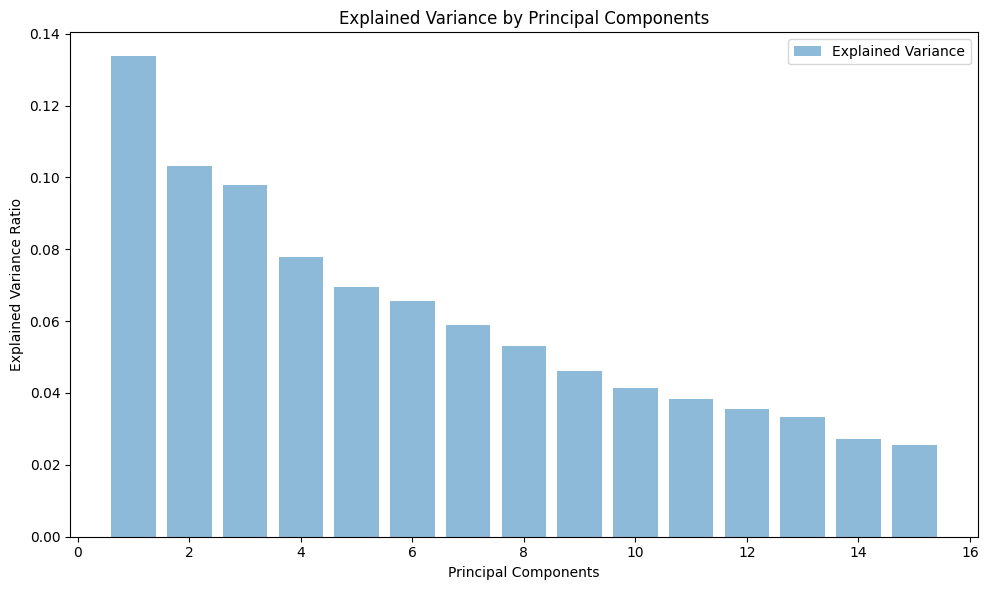

In [41]:

# Зменшення вимірності за допомогою PCA
pca = PCA(15)
features_pca = pca.fit_transform(features_scaled)
explained_variance = pca.explained_variance_ratio_


# Графік explained variance для кожної компоненти
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
# Розподіл даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:

# Навчання моделі (Random Forest в даному випадку)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Навчання PCA моделі з усіма компонентами
pca0 = PCA()
X_pca0 = pca0.fit_transform(X_train)

# Аналіз explained variance
explained_variance = pca0.explained_variance_ratio_


# Графік explained variance для кожної компоненти
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.tight_layout()
plt.show()


In [44]:

# Прогнозування та оцінка моделі
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       907
         1.0       0.96      0.96      0.96       919
         2.0       0.97      0.93      0.95       879
         3.0       0.95      0.95      0.95       873
         4.0       0.98      0.99      0.99       927
         5.0       0.97      0.99      0.98       902
         6.0       0.99      0.98      0.99       917
         7.0       0.95      0.97      0.96       878
         8.0       0.96      0.97      0.97       909
         9.0       0.96      0.95      0.96       889

    accuracy                           0.96      9000
   macro avg       0.96      0.96      0.96      9000
weighted avg       0.96      0.96      0.96      9000



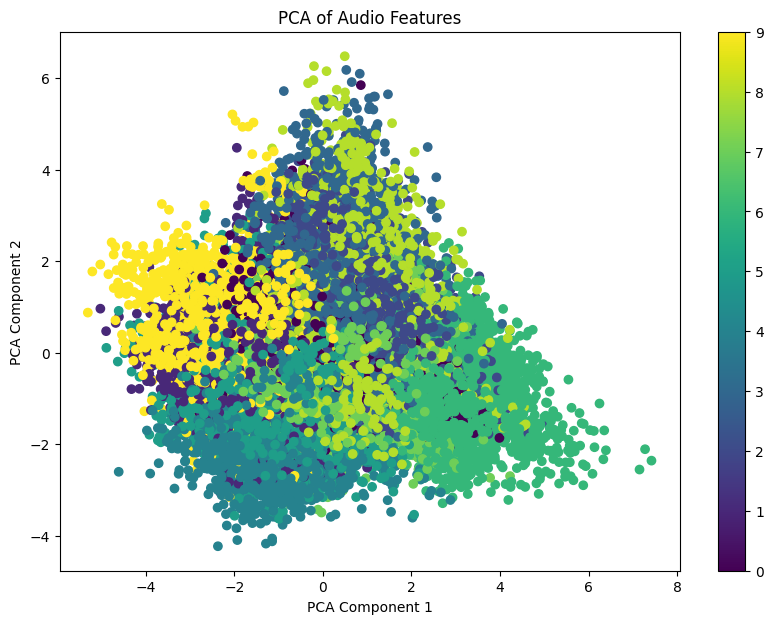

In [45]:
# Візуалізація компонент PCA (якщо потрібно)
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Audio Features')
plt.colorbar()
plt.show()